"Машинное обучение для задач ИБ"

Лабораторная работа №1. 

Макаров Андрей Романович 6231.


В данной работе хотел сравнить нейросеть на базе керасс с СК-леарн-классификаторами.

Обучил их всех и в конце сравнил.

В файле предикт используются веса для предстазания которые создаются в этом юпитере.

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import sklearn, sklearn.model_selection

from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet

import tensorflow as tf

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.feature_selection import SelectKBest, chi2
from sklearn.ensemble import ExtraTreesClassifier

from sklearn.model_selection import GridSearchCV

#Зависимости для cnn
import keras 
from keras.models import Sequential 
from keras.layers import Dense


from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, confusion_matrix, accuracy_score,f1_score,roc_curve

2022-10-18 18:55:34.144008: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-10-18 18:55:34.269268: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-10-18 18:55:34.710998: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2022-10-18 18:55:34.711046: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or 

In [2]:
# Подгрузили датасет и вывели краткое описание
df_features = pd.read_csv('./data/features_train.csv')
df_classes = pd.read_csv('./data/classes_train.csv') #df_classes['is_bot']

In [3]:
df_features1 = df_features.copy()
df_features1['is_bot'] = df_classes['is_bot']

In [4]:
#посмотрели что получилось, для проверки на пропущенные значения
df_features1.head(-10)

,statuses_count,followers_count,friends_count,favourites_count,listed_count,is_default_profile,is_profile_use_background_image,is_verified,user_age,tweets_freq,...,friends_growth_rate,favourites_growth_rate,listed_growth_rate,followers_friends_ratio,screen_name_length,num_digits_in_screen_name,length_of_name,num_digits_in_name,description_length,is_bot
0,5124,6641,3074,13768,126,0,0,1,2711,1.890077,...,1.133899,5.078569,0.046477,2.160377,12,0,14,0,73,0
1,10672,8465,1575,4561,191,0,1,1,4424,2.412297,...,0.356013,1.030967,0.043174,5.374603,11,0,23,0,142,0
2,704,3108,454,2400,77,0,0,0,1358,0.518409,...,0.334315,1.767305,0.056701,6.845815,12,0,18,0,90,0
3,6091,304528,526,599,1515,0,1,1,4214,1.445420,...,0.124822,0.142145,0.359516,578.950570,10,0,11,0,51,0
4,12967,13693,204,1177,452,0,1,1,3200,4.052187,...,0.063750,0.367812,0.141250,67.122549,13,0,14,0,106,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2385,3075,1295,4337,34,46,0,1,0,2198,1.398999,...,1.973157,0.015469,0.020928,0.298593,13,0,15,0,145,1
2386,141273,2650,3968,92379,87,1,1,0,2149,65.738948,...,1.846440,42.986971,0.040484,0.667843,6,0,9,0,143,1
2387,981,62,0,0,19,1,1,0,1657,0.592034,...,0.000000,0.000000,0.011467,23524.000000,15,0,16,0,60,1
2388,241,63,0,9,2,1,1,0,1015,0.237438,...,0.000000,0.008867,0.001970,23524.000000,9,0,14,0,160,1


In [5]:
#проверяем пропущенные значения
df_features1.count()

statuses_count                     2400
followers_count                    2400
friends_count                      2400
favourites_count                   2400
listed_count                       2400
is_default_profile                 2400
is_profile_use_background_image    2400
is_verified                        2400
user_age                           2400
tweets_freq                        2400
followers_growth_rate              2400
friends_growth_rate                2400
favourites_growth_rate             2400
listed_growth_rate                 2400
followers_friends_ratio            2400
screen_name_length                 2400
num_digits_in_screen_name          2400
length_of_name                     2400
num_digits_in_name                 2400
description_length                 2400
is_bot                             2400
dtype: int64

<AxesSubplot: >

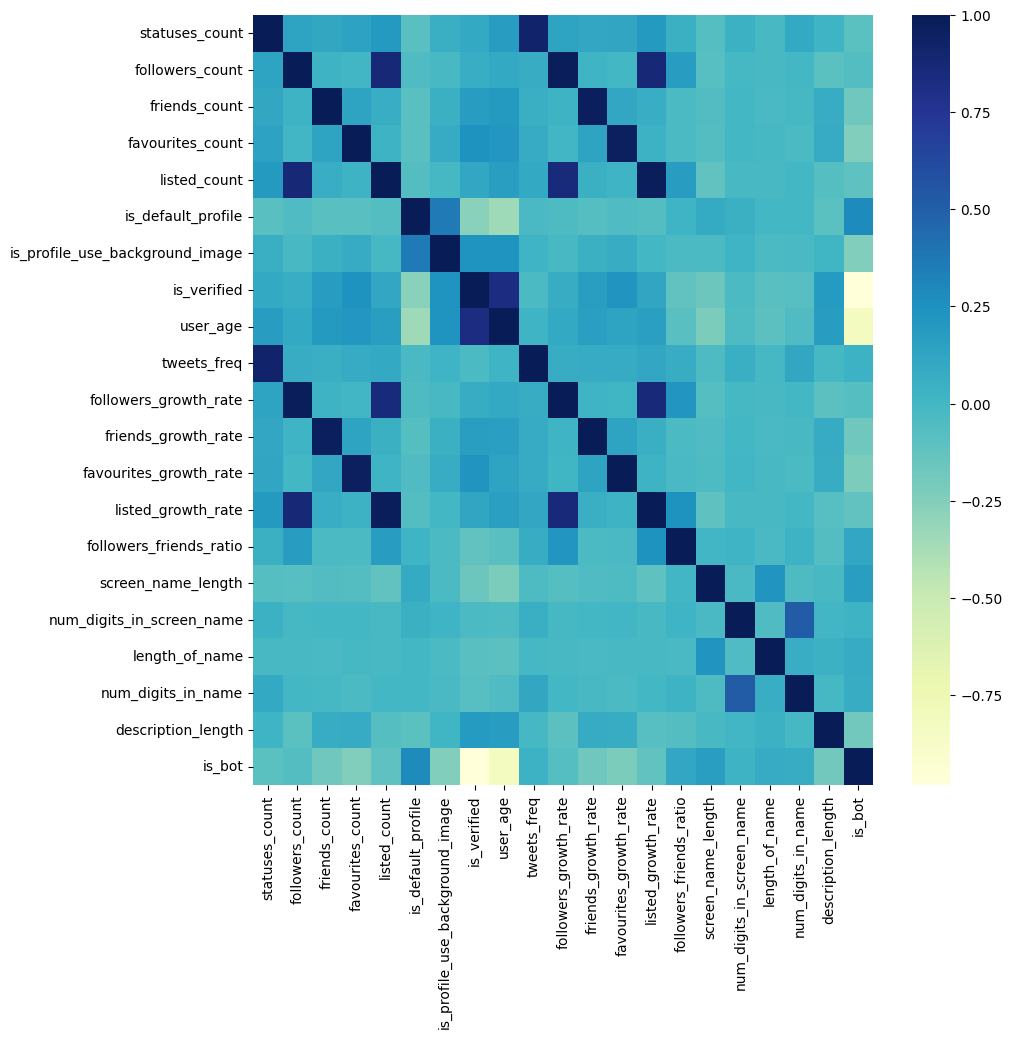

In [6]:
#посмотрели какие признаки коррелируют а какие нет
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(df_features1.corr(), cmap = "YlGnBu")

Подготовим данные для нейросети

In [7]:
#Данные для cnn; теперь Х и У это нампи массивы
X = df_features.values 
Y = df_classes.values

# Нормализация данных 
from sklearn.preprocessing import StandardScaler 
sc = StandardScaler() 
X = sc.fit_transform(X)


from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
y = ohe.fit_transform(Y).toarray()

In [8]:
#поменяли формат разметки для нейросети
y[0]

array([1., 0.])

In [9]:
#разбили данные для нейросети
X_train_nn,X_test_nn,y_train_nn,y_test_nn = train_test_split(X,y,test_size = 0.35)

In [10]:
#построили нейросеть
model = Sequential()
model.add(Dense(16, input_dim=20, activation='elu'))
model.add(Dense(12, activation='elu'))
model.add(Dense(2, activation='softmax'))


2022-10-18 18:55:38.595882: E tensorflow/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: CUDA_ERROR_SYSTEM_DRIVER_MISMATCH: system has unsupported display driver / cuda driver combination
2022-10-18 18:55:38.595928: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:169] retrieving CUDA diagnostic information for host: anma-IPG
2022-10-18 18:55:38.595933: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:176] hostname: anma-IPG
2022-10-18 18:55:38.596110: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:200] libcuda reported version is: 495.29.5
2022-10-18 18:55:38.596134: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:204] kernel reported version is: 520.61.5
2022-10-18 18:55:38.596138: E tensorflow/stream_executor/cuda/cuda_diagnostics.cc:313] kernel version 520.61.5 does not match DSO version 495.29.5 -- cannot find working devices in this configuration
2022-10-18 18:55:38.596433: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow

In [11]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [12]:
history = model.fit(X, y, validation_data = (X_test_nn, y_test_nn),batch_size=32, epochs=50)

Epoch 1/50
75/75 [==============================] - 0s 2ms/step - loss: 0.4355 - accuracy: 0.8554 - val_loss: 0.1985 - val_accuracy: 0.9774
Epoch 2/50
75/75 [==============================] - 0s 892us/step - loss: 0.1240 - accuracy: 0.9854 - val_loss: 0.0944 - val_accuracy: 0.9845
Epoch 3/50
75/75 [==============================] - 0s 879us/step - loss: 0.0656 - accuracy: 0.9896 - val_loss: 0.0639 - val_accuracy: 0.9845
Epoch 4/50
75/75 [==============================] - 0s 881us/step - loss: 0.0453 - accuracy: 0.9908 - val_loss: 0.0457 - val_accuracy: 0.9881
Epoch 5/50
75/75 [==============================] - 0s 900us/step - loss: 0.0360 - accuracy: 0.9917 - val_loss: 0.0346 - val_accuracy: 0.9881
Epoch 6/50
75/75 [==============================] - 0s 907us/step - loss: 0.0301 - accuracy: 0.9917 - val_loss: 0.0303 - val_accuracy: 0.9893
Epoch 7/50
75/75 [==============================] - 0s 913us/step - loss: 0.0263 - accuracy: 0.9933 - val_loss: 0.0260 - val_accuracy: 0.9893
Epoch 8/

In [13]:
y_pred = model.predict(X_test_nn)
#Converting predictions to label
pred = list()
for i in range(len(y_pred)):
    pred.append(np.argmax(y_pred[i]))
#Converting one hot encoded test label to label
test = list()
for i in range(len(y_test_nn)):
    test.append(np.argmax(y_test_nn[i]))

27/27 [==============================] - 0s 447us/step


In [14]:
#Точность модели и ф-мера
a = accuracy_score(pred,test)
print('Accuracy is:', a*100)
f1_mera_nn = f1_score(pred, test)
print('f1_score:', f1_mera_nn)

Accuracy is: 99.76190476190476
f1_score: 0.9954954954954954


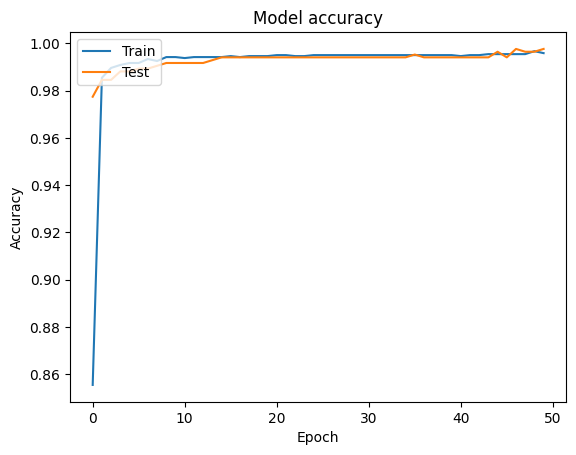

In [15]:

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

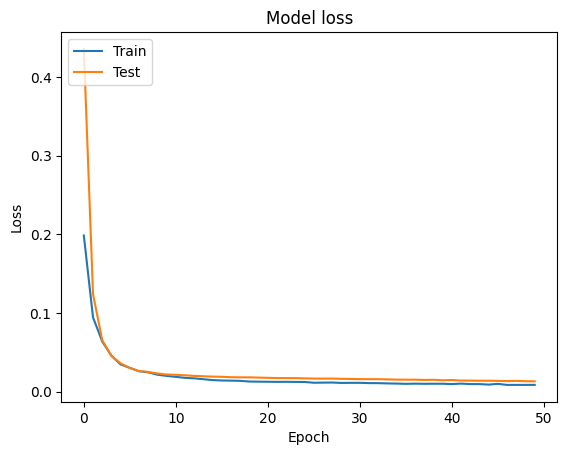

In [16]:
plt.plot(history.history['val_loss']) 
plt.plot(history.history['loss']) 
plt.title('Model loss') 
plt.ylabel('Loss') 
plt.xlabel('Epoch') 
plt.legend(['Train', 'Test'], loc='upper left') 
plt.show()

Другие классификаторы

In [17]:
#разделим данные на треин и тест для обучнеия классификаторов
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(df_features, df_classes, test_size = 0.20, random_state = 0)


In [18]:
X_train.shape, X_test.shape

((1920, 20), (480, 20))

In [19]:
# для сравнения значений F-меры
F_measure = {'LogisticRegression':0, 
             'KNeighborsClassifier':0, 
             'DecisionTreeClassifier':0,
             'RandomForestClassifier':0 }

In [20]:
# Стандартизируем данные

Log = LogisticRegression()
scaler = StandardScaler()
X_train_M = scaler.fit_transform(X_train)
X_test_M = scaler.transform(X_test)

In [21]:
# обучение

model_Log = LogisticRegression()
    
model_Log.fit(X_train_M, y_train)
Y_Log = model_Log.predict(X_test_M)

F_measure['LogisticRegression'] = f1_score(y_test, Y_Log, average = "weighted")

/home/anma/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [22]:
# KNN Стандартизируем данные
KNN = KNeighborsClassifier()
scaler = StandardScaler()

steps_KNN = [('normalizer', scaler), ('KNN', KNN)]
pipe_KNN = Pipeline(steps_KNN)

In [23]:
# обучение KNN

model_KNN = KNeighborsClassifier()
model_KNN.fit(X_train, y_train)
Y_KNN = model_KNN.predict(X_test)

F_measure['KNeighborsClassifier'] = f1_score(y_test, Y_KNN, average = "weighted")

/home/anma/.local/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [24]:
# Стандартизируем данные DecisionTreeClassifier

DTC = DecisionTreeClassifier()
scaler = StandardScaler()

steps_DTC = [('normalizer', scaler), ('DTC', DTC)]
pipe_DTC = Pipeline(steps_DTC)

In [25]:
# обучение DecisionTreeClassifier
model_DTC = DecisionTreeClassifier()
model_DTC.fit(X_train, y_train)
Y_DTC = model_DTC.predict(X_test)

F_measure['DecisionTreeClassifier'] = f1_score(y_test, Y_DTC, average = "weighted")

In [26]:
# Стандартизируем данные RandomForestClassifier
RFC = RandomForestClassifier()
scaler = StandardScaler()

steps_RFC = [('normalizer', scaler), ('RFC', RFC)]
pipe_RFC = Pipeline(steps_RFC)

In [27]:
# обучение
model_RFC = RandomForestClassifier()
model_RFC.fit(X_train, y_train)
Y_RFC = model_RFC.predict(X_test)

F_measure['RandomForestClassifier'] = f1_score(y_test, Y_RFC, average = "weighted")

/tmp/ipykernel_22063/2212979723.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_RFC.fit(X_train, y_train)


In [28]:
maxim = 0
for i, j in F_measure.items():

    if j > maxim:
        maxim = j
        model_max = i
print ('Наибольшее значение F-меры:', maxim, '.  Модель:', model_max)

Наибольшее значение F-меры: 0.991692546583851 .  Модель: LogisticRegression


In [29]:
print ('Наибольшее значение F-меры из 4х классификаторов:', maxim, '.  Модель:', model_max)
print ('Значение F-меры нейросети:', f1_mera_nn, '.  Модель:', "NN")

Наибольшее значение F-меры из 4х классификаторов: 0.991692546583851 .  Модель: LogisticRegression
Значение F-меры нейросети: 0.9954954954954954 .  Модель: NN


In [30]:
model.save('./keras_model_nn1.h5')